In [1]:
# imports -> выполнить в первую очередб
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sst
import statsmodels.stats.weightstats as ssw

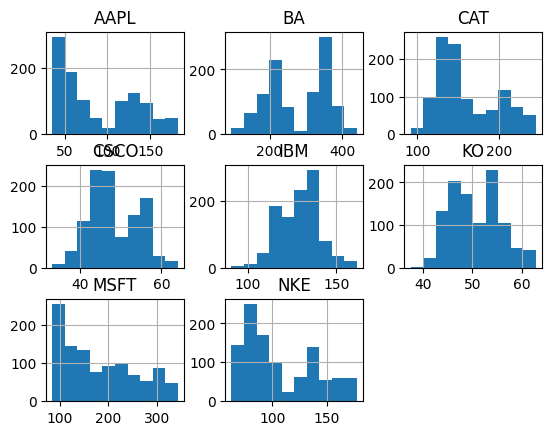

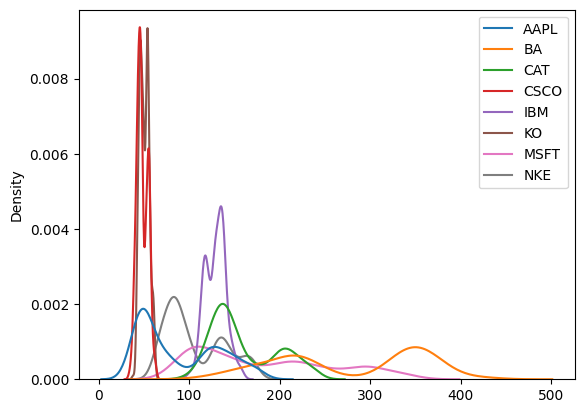

In [112]:
# чтение данных
# укажите где расположен файл с данными
path: str = 'C:\Dev\pankratov\cw.csv'
data = pd.read_csv(path, sep=';', index_col ='Date', parse_dates= ['Date'])

data.hist()
plt.show();

sns.kdeplot(data=data)
plt.show();

In [5]:
# первое задание
def find_risk(data: pd.DataFrame, column: str) -> float:
    """
    функция вычисляет риски для акций
    поменять нужно только второй параметр
    """
    income = data[column].pct_change().dropna()
    return np.round(income.std(), 3)

find_risk(data, 'AAPL')

0.021

In [6]:
# второе задание
def calculate_shapiro(data: pd.Series)->float:
    """
    Вычисляет коэффициент Шапиро,
    меняем только название акций
      """
    income = data.pct_change().dropna()
    return round(sst.shapiro(income)[0], 2)
calculate_shapiro(data['CAT'])

0.96

In [113]:
# третье задание

def find_p_value(data: pd.Series, income: float) -> float:
    """проверяем гипотезу - выводим п-значение"""
    income = data.pct_change().dropna()
    return round(sst.ttest_1samp(income, 0.002)[1], 4)
find_p_value(data['AAPL'], 0.002)

0.4569

In [115]:
# четвертое задание
class BoxAnal:
    """
    Класс содержит анализ по выбросам
    """


    def __init__(self, df, column, factor=None):
        """
        активация...
        """
        self.df = df
        self.column = column
        self.factor = factor
        if column  not in set(df.columns):
            raise BaseException('ошибка при формировании класса')
        if self.df[self.column].isna().sum() > 0:
            raise BaseException('дурацкий numpy')

    @property
    def __metrix(self):
        """
        Рассчитываем показатели:
        -второй квартиль
        -третий квартиль
        -межквартильный размах
        """
        q75, q25 = np.percentile(self.df[self.column], [75 ,25])
        iqr = q75 - q25
        metrixs = {'iqr': iqr,
                   'q75': q75,
                   'q25': q25}
        return metrixs
    
    @property
    def iqr(self):
        """межквартильный размах"""
        return self.__metrix['iqr']

    @property
    def midian(self):
        """медиана"""
        return self.df[self.column].median()

    @property
    def quentile_75(self):
        return self.__metrix['q75']

    @property
    def max_not_anom(self):
        """
        Вычисляет верхнюю границу усов
        """
        max_not_anom = self.__metrix['q75'] + 1.5*self.__metrix['iqr']
        if (max_not_anom > self.df[self.column].max()):
            return self.df[self.column].max()
        else:
            return max_not_anom

    @property
    def min_not_anom(self):
        """
        Вычисляет нижнюю границу усов
        """
        min_not_anom = self.__metrix['q25'] - 1.5*self.__metrix['iqr']
        if min_not_anom < self.df[self.column].min():
            return self.df[self.column].min()
        else:
            return min_not_anom
    
    @ property
    def anom(self):
        """аномальные значения"""
        anom = self.df[(self.df[self.column] < self.min_not_anom) | (self.df[self.column] > self.max_not_anom)][self.column]
        return anom
    
    @ property
    def min_p_anom(self):
        """минималльный положительный выброс по доходности"""
        return self.anom[self.anom > 0].min()
    
    @property
    def represantation_box(self):
        """выводит бокс-плот"""
        sns.boxplot(x=self.df[self.column], y=None)
        plt.show();

    @property
    def represantation_scatter(self):
        """"выводит точечный"""
        plt.figure(figsize=(15,15))
        sns.scatterplot(x=self.df.index, y=self.df[self.column])
        plt.axhline(y=self.max_not_anom, color='red', linestyle='dotted', label='Максимальное значение без выбросов')
        plt.axhline(y=self.min_not_anom, color='red', linestyle='dotted', label='Минимальное значение без выбросов')
        plt.axhline(y=self.midian, color='green', linestyle='--', label='Медиана')
        plt.legend()
        plt.show();

    @property
    def represent_in_detail(self):
        """приближенный бокс-плот"""
        sns.boxplot(x=self.df[self.column]).set_xlim([self.min_not_anom, self.max_not_anom])
        plt.show();

mine = BoxAnal(data.pct_change().dropna(), 'KO')
print(round(mine.min_p_anom, 3))

# 12 задание
test12 = BoxAnal(data, 'NKE')
print(round(test12.iqr, 2))

# 14 Задание
BA = BoxAnal(data.pct_change().dropna(), 'BA')
print(len(BA.anom))



0.025
52.95
70


In [ ]:
# Задание 5
# ?

In [9]:
# задание 6
def number_period(data: pd.Series, value: int) -> int:
    """
    кол-во периодов, стоимрость больше значения
    меняем только название акции
    """
    return sum(data > value)
number_period(data['CAT'], 170)

348

In [116]:
# Задание 7
def mean_income(column: str) -> float:
    """Выводим среднюю доходность"""
    return round(data[column].pct_change().dropna().mean(), 5)

mean_income('AAPL')

0.00153

In [11]:
# Задание 8
def calc_interval(column):
    """верхяя граница доверительного интервала для средней доходности"""
    d_AAPL_yield = ssw.DescrStatsW(data.pct_change().dropna()[column])
    AAPL_int = d_AAPL_yield.tconfint_mean(alpha=0.95)[1]
    return round(AAPL_int, 5)
calc_interval("AAPL")

0.00157

In [62]:
# задание 9
# ttest о равенстве средней доходности - внимание на даты
group_1 = data.pct_change().dropna().loc['02.03.2020':'31.03.2020']['KO']
group_2 = data.pct_change().dropna().loc['01.03.2021':'31.03.2021']['KO']

round(sst.ttest_ind(group_1, group_2)[0], 2)

-0.96

In [19]:
# задание 10
def find_min_income_day(column: str):
    """наименьшая доходность акциии"""
    if column not in data.columns:
        raise ValueError('нет такой компании, перепроверь!')
    data_changes = data[column].pct_change().dropna()
    return data_changes.idxmin()

find_min_income_day('MSFT')

'16.03.2020'

0.0105
0.0029


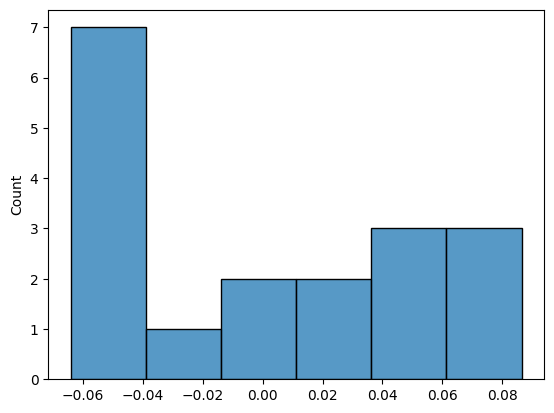

In [111]:
# 11 задание - что-то совсем плохое - точечная оценка средней доходности
index_1 = [index[0:5] for index in group_1.index]
index_2 = [index[0:5] for index in group_2.index]
g1 = group_1.to_dict()
g2 = group_2.to_dict()

# разница средних
print(round(group_2.mean()-group_1.mean(), 4))

# mean difference per day
common_days = list(set(index_1).intersection(set(index_2)))
diff = [g2[day + '.2021'] - g1[day + '.2020'] for day in common_days]
sns.histplot(diff)
print(round(sum(diff)/len(diff), 4))


In [4]:
# 13
def find_max_income_day(column: str):
    """находит дату максимальной доходности"""
    if column not in data.columns:
        raise ValueError('нет такой компании, перепроверь!')
    data_changes = data[column].pct_change().dropna()
    return data_changes.idxmax()

find_max_income_day('MSFT')

'13.03.2020'